# Read in the data

In [19]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

star_wars = pd.read_csv("datasets/star_wars.csv", encoding = "ISO-8859-1")
star_wars.loc[0]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

# Remove rows with null or NaN Respondant ID

In [20]:
is_not_null = pd.notnull(star_wars['RespondentID'])
star_wars = star_wars.loc[is_not_null]

# Convert Yes/No responses to booleans

In [21]:
yes_no_mapping = {'Yes': True, 'No': False}

# Map column at location 1 and 2 to Yes/No
star_wars[star_wars.columns[1]] = star_wars[star_wars.columns[1]].map(yes_no_mapping)
star_wars[star_wars.columns[2]] = star_wars[star_wars.columns[2]].map(yes_no_mapping)

# Map Movie seen/not seen column to Booleans

In [22]:
star_wars_maps1 = {"Star Wars: Episode I  The Phantom Menace": True, "NaN": False}
star_wars_maps2 = {"Star Wars: Episode II  Attack of the Clones": True, "NaN": False}
star_wars_maps3 = {"Star Wars: Episode III  Revenge of the Sith": True, "NaN": False}
star_wars_maps4 = {"Star Wars: Episode IV  A New Hope": True, "NaN": False}
star_wars_maps5 = {"Star Wars: Episode V The Empire Strikes Back": True}
star_wars_maps6 = {"Star Wars: Episode VI Return of the Jedi": True, "NaN" : False}

star_wars[star_wars.columns[3]] = star_wars[star_wars.columns[3]].map(star_wars_maps1)
star_wars[star_wars.columns[4]] = star_wars[star_wars.columns[4]].map(star_wars_maps2)
star_wars[star_wars.columns[5]] = star_wars[star_wars.columns[5]].map(star_wars_maps3)
star_wars[star_wars.columns[6]] = star_wars[star_wars.columns[6]].map(star_wars_maps4)
star_wars[star_wars.columns[7]] = star_wars[star_wars.columns[7]].map(star_wars_maps5)
star_wars[star_wars.columns[8]] = star_wars[star_wars.columns[8]].map(star_wars_maps6)

# Rename column names for movie seen/not seen columns

In [23]:
movie_col_names_map = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6",}

star_wars.rename(columns = movie_col_names_map, inplace = True)

# Clean ranking columns

In [24]:
# Change type to integers
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename columns
rank_col_names_map = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10" : "ranking_2",
    "Unnamed: 11" : "ranking_3",
    "Unnamed: 12" : "ranking_4",
    "Unnamed: 13" : "ranking_5",
    "Unnamed: 14" : "ranking_6",}
star_wars.rename(columns = rank_col_names_map, inplace = True)

# Determine highest rated movie

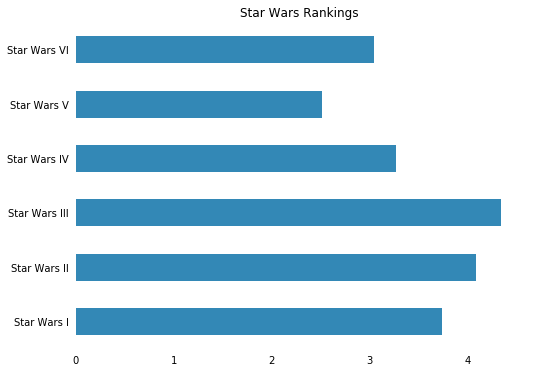

In [25]:
ranking_means = star_wars[star_wars.columns[9:15]].apply(np.mean)

cb_blue = (0/255.0, 107/255.0, 164/255.0)
cb_orange = (255/255.0, 128/255.0, 14/255.0)

fig, ax = plt.subplots(figsize = (8,6))
ranking_means.plot.barh(ax = ax, color = cb_blue, alpha = 0.8)

for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)

ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
ax.set_yticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
ax.set_title('Star Wars Rankings')

plt.show()

### Since Star Wars V has lowest rank, this is the most popular movie amoung star wars series and Star Wars III is the least popular movie.

# Finding the most viewed movie

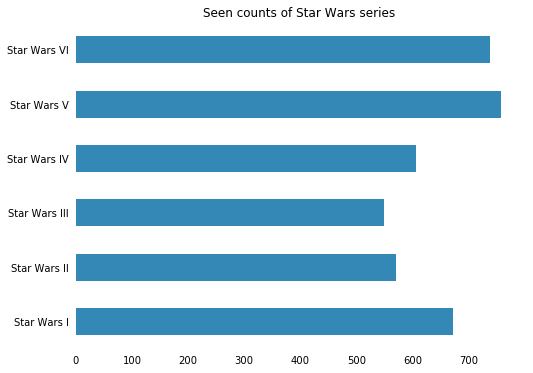

In [26]:
seen_counts = star_wars[star_wars.columns[3:9]].sum()

fig, ax = plt.subplots(figsize = (8,6))
seen_counts.plot.barh(ax = ax, color = cb_blue, alpha = 0.8)

for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)

ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
ax.set_yticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
ax.set_title('Seen counts of Star Wars series')

plt.show()

### Star Wars V is most viewed movie in the series (which is also the most rated movie). Star Wars III is least seen movie, which is also the least popular movie in the series. 
### Hence the viewership is correlated with rating of the movie

# Exploring data for Male/Female segments

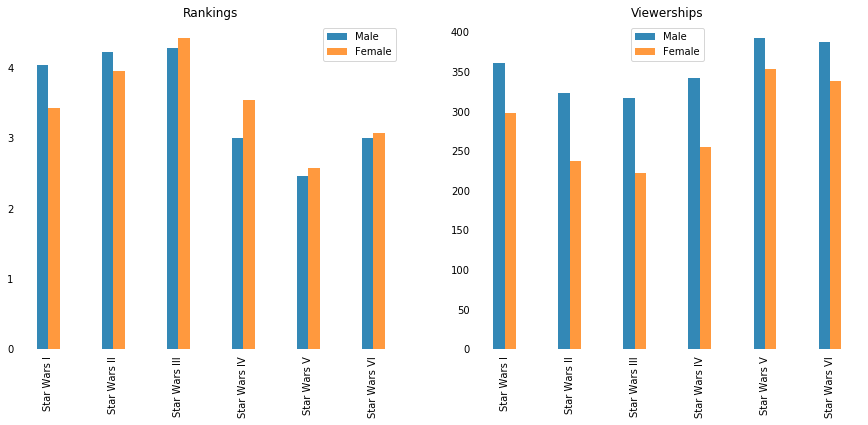

In [27]:
# Determine highest rated movie and most viewed movie among the series for males and females separately
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Create DataFrame from rankings
ranking_means_males = males[males.columns[9:15]].apply(np.mean)
ranking_means_females = females[females.columns[9:15]].apply(np.mean)
ranking_males_females = pd.DataFrame(data = {'Male': ranking_means_males, 'Female': ranking_means_females})

# Create DataFrame from viewerships
seen_means_males = males[males.columns[3:9]].apply(np.sum)
seen_means_females = females[females.columns[3:9]].apply(np.sum)
seen_males_females = pd.DataFrame(data = {'Male': seen_means_males, 'Female': seen_means_females})

bar_width = 0.35
colors = [cb_blue, cb_orange]
cols = ['Male','Female']

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    
    if i == 0:
        ranking_males_females[cols].plot.bar(ax = ax, width = bar_width, color = colors, alpha = 0.8)
        ax.set_title('Rankings')
    else:
        seen_males_females[cols].plot.bar(ax = ax, width = bar_width, color = colors, alpha = 0.8)
        ax.set_title('Viewerships')

    # Remove spines
    for key, val in ax.spines.items():
        ax.spines[key].set_visible(False)
        
    ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
    ax.set_xticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
     
plt.legend(loc='upper center') # This will change legend of the second plot only, which is desired
plt.show()

### From the plot above we observe that Star Wars I and II are more popular among females and Star Wars III, IV, V and VI are more popular among males
### From viewrships, we observe that overall males watch Star Wars series more than females

# Exploring favorite characters

In [40]:
# Map the responses on a scale of 0 to 5
fav_map = {"Very favorably" : 5,
           "Somewhat favorably" : 4,
           "Neither favorably nor unfavorably (neutral)" : 3,
           "Somewhat unfavorably" : 2,
           "Very unfavorably" : 1,
           "Unfamiliar (N/A)" : 0,
           "NaN" : 0
}

for i in range(15,29):
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(fav_map)

# Rename the columns
char_names = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 
             'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']
# Extract relevant col names for character columns and convert to list
col_names = star_wars.columns[15:29].values.tolist()

# Create a column name, renaming mapping dictionary
col_name_map = {col_name: char_names[i] for (i, col_name) in enumerate(col_names)}

# Rename column names
star_wars.rename(columns = col_name_map, inplace = True)

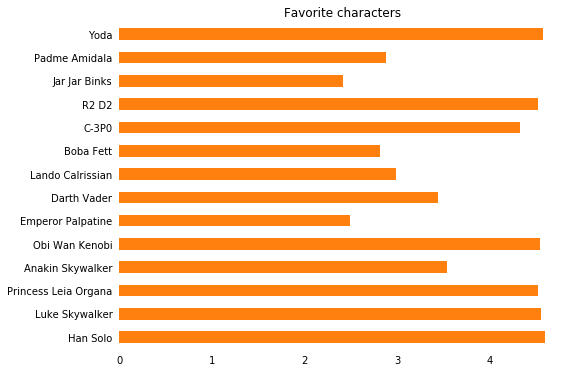

In [48]:
fav_character_score_means = star_wars[star_wars.columns[15:29]].apply(np.mean)

fig, ax = plt.subplots(figsize = (8,6))
fav_character_score_means.plot.barh(ax = ax, color = cb_orange, alpha = 1)

for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)

ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
#ax.set_yticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
ax.set_title('Favorite characters')

plt.show()